In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [3]:
import os

import scmdata
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from ndcs.constants import (
    PROCESSED_DATA_DIR,
    NDC_TARGET_RELEASE,
    RAW_DATA_DIR,
)

<IPython.core.display.Javascript object>

In [4]:
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["pdf.use14corefonts"] = True
plt.rcParams["text.usetex"] = False
plt.rcParams["axes.unicode_minus"] = False

<IPython.core.display.Javascript object>

In [5]:
DATA_DIR = os.path.join(PROCESSED_DATA_DIR, "climate_assessment", "merged")
OUT_FNAME = os.path.join(DATA_DIR, f"output_{NDC_TARGET_RELEASE}_complete.csv")
OUT_SENSITIVITY_FNAME = os.path.join(
    DATA_DIR, f"output_{NDC_TARGET_RELEASE}_sensitivity.csv"
)
OUT_METHANE_PLEDGES_FNAME = os.path.join(
    DATA_DIR, f"output_{NDC_TARGET_RELEASE}_methanePledges.csv"
)

<IPython.core.display.Javascript object>

In [6]:
DATA_DIR

'/home/jared/code/cr/ndc-realisations-2021/src/ndcs/../../data/processed/climate_assessment/merged'

<IPython.core.display.Javascript object>

In [8]:
all_output = scmdata.ScmRun(OUT_FNAME)

OSError: no data file `/home/jared/code/cr/ndc-realisations-2021/src/ndcs/../../data/processed/climate_assessment/merged/output_12Nov2021a_CR_complete.csv` found!

<IPython.core.display.Javascript object>

In [7]:
results_cleaned = all_output.filter(
    pathway_id=["2021-10-18_1", "2021-10-28_2", "2021-11-01_1", "2021-11-09_1"]
)

<IPython.core.display.Javascript object>

In [8]:
results_sensitivity = scmdata.run_append(
    [scmdata.ScmRun(OUT_SENSITIVITY_FNAME), scmdata.ScmRun(OUT_METHANE_PLEDGES_FNAME)]
)

<IPython.core.display.Javascript object>

In [9]:
# results_sensitivity.get_unique_meta("variable")

<IPython.core.display.Javascript object>

In [10]:
## read in SSP comparison data.

SSP_FNAME = os.path.join(
    PROCESSED_DATA_DIR, "SSP_emission_data", "KeySSPs_TotalAR6GWP_CH4data2.csv"
)

ssp_data = pd.read_csv(SSP_FNAME)

<IPython.core.display.Javascript object>

In [11]:


AR6GSAT_FNAME = os.path.join(
    PROCESSED_DATA_DIR, "AR6_GSAT", "AR6_GSAT_June2021.csv"
)

ar6gsat_data = pd.read_csv(AR6GSAT_FNAME)




<IPython.core.display.Javascript object>

In [12]:
ar6gsat_data


,Year,AR6_GSAT
0,1850,-0.059
1,1851,0.049
2,1852,0.079
3,1853,0.046
4,1854,0.049
...,...,...
166,2016,1.264
167,2017,1.179
168,2018,1.101
169,2019,1.226


<IPython.core.display.Javascript object>

## Read in country info

In [10]:
pathway_countries_fn = os.path.join(
    PROCESSED_DATA_DIR, "{}_pathway_countries.csv".format(NDC_TARGET_RELEASE)
)
pathway_countries_fn

'/home/jared/code/cr/ndc-realisations-2021/src/ndcs/../../data/processed/12Nov2021a_CR_pathway_countries.csv'

<IPython.core.display.Javascript object>

In [11]:
country_submission_dates = pd.read_csv(pathway_countries_fn)


FileNotFoundError: [Errno 2] No such file or directory: '/home/jared/code/cr/ndc-realisations-2021/src/ndcs/../../data/processed/12Nov2021a_CR_pathway_countries.csv'

<IPython.core.display.Javascript object>

In [15]:
country_submission_dates[
    country_submission_dates.pathway_id.isin(
        results_cleaned.get_unique_meta("pathway_id")
    )
]

,pathway_id,last_country
342,2021-10-18_1,BHR
349,2021-10-28_2,CHN
351,2021-11-01_1,IND
353,2021-11-09_1,VEN


<IPython.core.display.Javascript object>

In [16]:
results_cleaned_list = []
for var_name in results_cleaned.get_unique_meta("variable"):
    subset = results_cleaned.filter(variable=var_name)

    tokens = var_name.split("|")
    subset["variable"] = "|".join(tokens)

    if "Percentile" in var_name:

        subset["variable"] = "|".join(tokens[:-1])
        quantile = float(tokens[-1][: -len("th Percentile")])

        subset["quantile"] = quantile / 100
    results_cleaned_list.append(subset)
results_cleaned = scmdata.run_append(results_cleaned_list)

<IPython.core.display.Javascript object>

In [17]:
results_sensitivity_list = []
for var_name in results_sensitivity.get_unique_meta("variable"):
    subset = results_sensitivity.filter(variable=var_name)

    tokens = var_name.split("|")
    subset["variable"] = "|".join(tokens)

    if "Percentile" in var_name:

        subset["variable"] = "|".join(tokens[:-1])
        quantile = float(tokens[-1][: -len("th Percentile")])

        subset["quantile"] = quantile / 100
    results_sensitivity_list.append(subset)
results_sensitivity = scmdata.run_append(results_sensitivity_list)

<IPython.core.display.Javascript object>

In [18]:
# results_cleaned.get_unique_meta("variable")

<IPython.core.display.Javascript object>

# Check latest

In [19]:
# results_cleaned.filter(
#     pathway_id="2021-11-03_1",
#     variable="Surface Temperature (GSAT)|MAGICCv7.5.3",
#     quantile=0.5,
#     country_extension="SSP1BL",
# ).timeseries()

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='time', ylabel='K'>

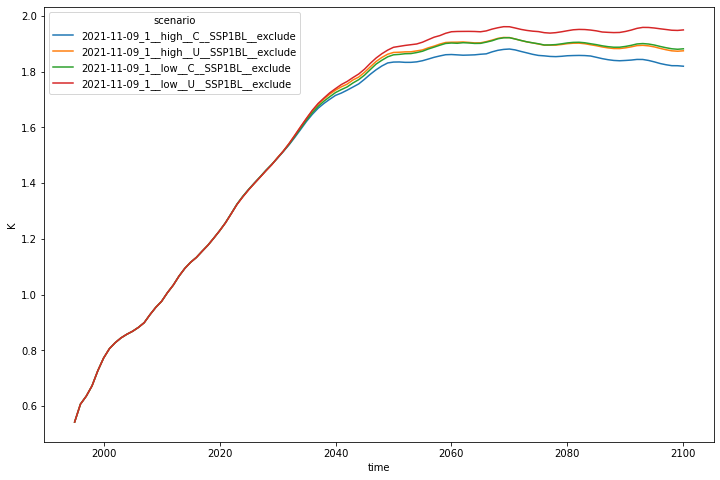

<IPython.core.display.Javascript object>

In [20]:
results_cleaned.filter(
    pathway_id="2021-11-09_1",
    variable="Surface Temperature (GSAT)|MAGICCv7.5.3",
    quantile=0.5,
    country_extension="SSP1BL",
).lineplot()

<AxesSubplot:xlabel='time', ylabel='K'>

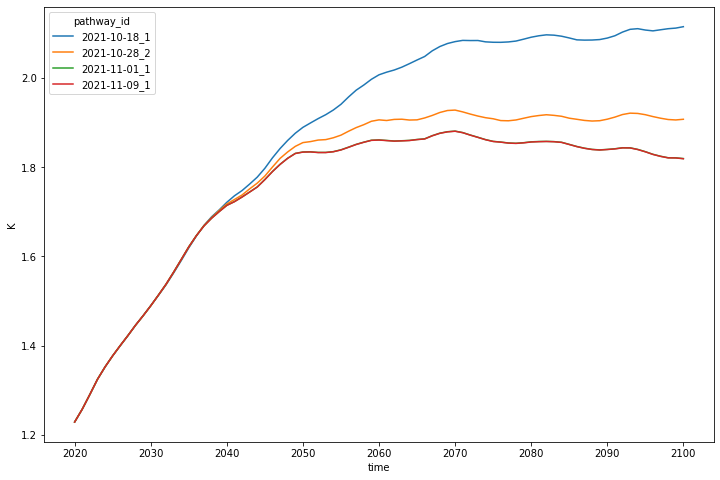

<IPython.core.display.Javascript object>

In [21]:
results_cleaned.filter(
    variable="Surface Temperature (GSAT)|MAGICCv7.5.3",
    quantile=0.5,
    country_extension="SSP1BL",
    ambition="high",
    conditionality="C",
    exclude_hot_air="exclude",
    year=range(2020, 2101),
).lineplot(hue="pathway_id")

<AxesSubplot:xlabel='time', ylabel='K'>

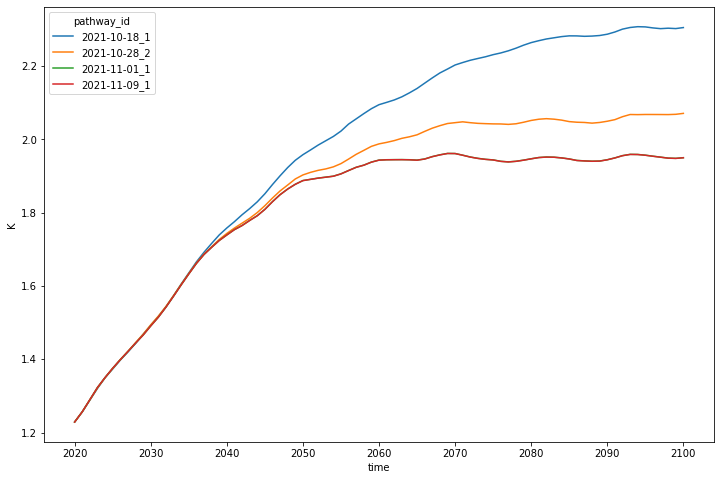

<IPython.core.display.Javascript object>

In [22]:
results_cleaned.filter(
    variable="Surface Temperature (GSAT)|MAGICCv7.5.3",
    quantile=0.5,
    country_extension="SSP1BL",
    ambition="low",
    conditionality="U",
    exclude_hot_air="exclude",
    year=range(2020, 2101),
).lineplot(hue="pathway_id")

In [23]:
results_sensitivity.filter(variable="Surface Temperature (GSAT)|MAGICCv7.5.3")

<scmdata.ScmRun (timeseries: 171, timepoints: 106)>
Time:
	Start: 1995-01-01T00:00:00
	End: 2100-01-01T00:00:00
Meta:
	     ambition conditionality exclude_hot_air extension   methane_pledges  \
	8284     high              C         exclude      2030               NaN   
	8285     high              C         include      2030               NaN   
	8286     high              C         exclude    SSP1BL               NaN   
	8287     high              C         include    SSP1BL               NaN   
	8288     high              U         exclude      2030               NaN   
	...       ...            ...             ...       ...               ...   
	8450      low              U         exclude    SSP1BL               NaN   
	8451      low              U         include    SSP1BL               NaN   
	8452     high              C         exclude    SSP1BL    conditionalCH4   
	8453     high              C         exclude    SSP1BL           fullCH4   
	8454     high              C      

<IPython.core.display.Javascript object>

In [24]:
results_sensitivity.head()

time                                                                                                                                                                                                  1995-01-01  \
ambition conditionality exclude_hot_air extension methane_pledges model         pathway_id   quantile region scenario                               unit variable                                                  
high     C              exclude         2030      NaN             NDC Factsheet 2021-11-09_1 0.1      World  2021-11-09_1__high__C__2030__exclude   ppb  Atmospheric Concentrations|CH4|MAGICCv7.5.3     1755.23   
                        include         2030      NaN             NDC Factsheet 2021-11-09_1 0.1      World  2021-11-09_1__high__C__2030__include   ppb  Atmospheric Concentrations|CH4|MAGICCv7.5.3     1755.23   
                        exclude         SSP1BL    NaN             NDC Factsheet 2021-11-09_1 0.1      World  2021-11-09_1__high__C__SSP1BL__exclude ppb  Atmospheric Concentrations|CH4|MAGICCv7.5.3     1755.23   
                        include         SSP1BL    NaN             NDC Factsheet 2021-11-09_1 0.1      World  2021-11-09_1__high__C__SSP1BL__include ppb  Atmospheric Concentrations|CH4|MAGICCv7.5.3     1755.23   
         U              exclude         2030      NaN             NDC Factsheet 2021-11-09_1 0.1      World  2021-11-09_1__high__U__2030__exclude   ppb  Atmospheric Concentrations|CH4|MAGICCv7.5.3     1755.23   

time                                                                                                                                                                                                  1996-01-01  \
ambition conditionality exclude_hot_air extension methane_pledges model         pathway_id   quantile region scenario                               unit variable                                                  
high     C              exclude         2030      NaN             NDC Factsheet 2021-11-09_1 0.1      World  2021-11-09_1__high__C__2030__exclude   ppb  Atmospheric Concentrations|CH4|MAGICCv7.5.3     1757.19   
                        include         2030      NaN             NDC Factsheet 2021-11-09_1 0.1      World  2021-11-09_1__high__C__2030__include   ppb  Atmospheric Concentrations|CH4|MAGICCv7.5.3     1757.19   
                        exclude         SSP1BL    NaN             NDC Factsheet 2021-11-09_1 0.1      World  2021-11-09_1__high__C__SSP1BL__exclude ppb  Atmospheric Concentrations|CH4|MAGICCv7.5.3     1757.19   
                        include         SSP1BL    NaN             NDC Factsheet 2021-11-09_1 0.1      World  2021-11-09_1__high__C__SSP1BL__include ppb  Atmospheric Concentrations|CH4|MAGICCv7.5.3     1757.19   
         U              exclude         2030      NaN             NDC Factsheet 2021-11-09_1 0.1      World  2021-11-09_1__high__U__2030__exclude   ppb  Atmospheric Concentrations|CH4|MAGICCv7.5.3     1757.19   

time                                                                                                                                                                                                  1997-01-01  \
ambition conditionality exclude_hot_air extension methane_pledges model         pathway_id   quantile region scenario                               unit variable                                                  
high     C              exclude         2030      NaN             NDC Factsheet 2021-11-09_1 0.1      World  2021-11-09_1__high__C__2030__exclude   ppb  Atmospheric Concentrations|CH4|MAGICCv7.5.3      1761.5   
                        include         2030      NaN             NDC Factsheet 2021-11-09_1 0.1      World  2021-11-09_1__high__C__2030__include   ppb  Atmospheric Concentrations|CH4|MAGICCv7.5.3      1761.5   
                        exclude         SSP1BL    NaN             NDC Factsheet 2021-11-09_1 0.1      World  2021-11-09_1__high__C__SSP1BL__exclude ppb  Atmospheric Concentrations|CH

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='time', ylabel='K'>

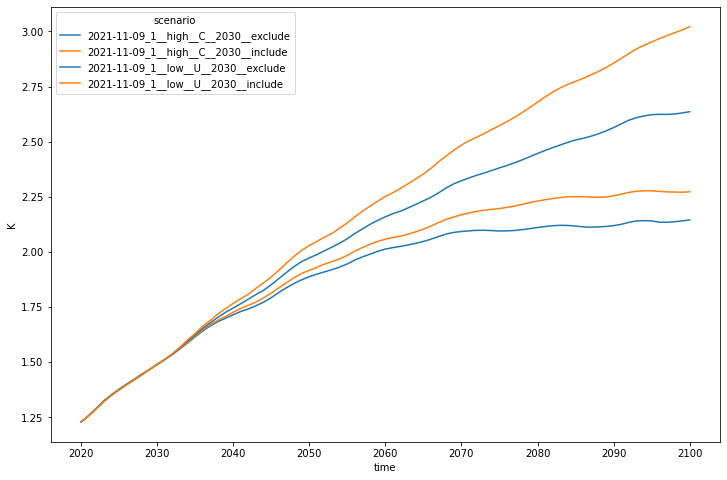

<IPython.core.display.Javascript object>

In [26]:
results_sensitivity.filter(
    variable="Surface Temperature (GSAT)|MAGICCv7.5.3",
    quantile=0.5,
    country_extension="2030",
    ambition="high",
    conditionality="C",
    year=range(2020, 2101),
).lineplot(hue="scenario")
results_sensitivity.filter(
    variable="Surface Temperature (GSAT)|MAGICCv7.5.3",
    quantile=0.5,
    country_extension="2030",
    ambition="low",
    conditionality="U",
    year=range(2020, 2101),
).lineplot(hue="scenario")

# Figures
For each scenario, we plot one panel GHG GWP-AR6 (Total excl. LULUCF) and one GSAT.
In each panel, there are three background scenarios, the SSP1-1.9, SSP1-2.6 and SSP2-4.5.

In [28]:
extended_emissions = scmdata.ScmRun(
    os.path.join(
        PROCESSED_DATA_DIR, "global_emissions_pathways", "emissions_ghg_extended.csv"
    )
)

extended_emissions_items = []
uniq_vars = [
    "pathway_id",
    "ambition",
    "conditionality",
    "country_extension",
    "exclude_hot_air",
]

for s in extended_emissions.groupby(uniq_vars):
    scenario = "__".join([s.get_unique_meta(c, True) for c in uniq_vars])
    s["scenario"] = scenario
    scenario = "__".join([s.get_unique_meta(c, True) for c in uniq_vars[1:]])
    s["scenario_without_pathway"] = scenario

    extended_emissions_items.append(s)
extended_emissions = scmdata.run_append(extended_emissions_items)


<IPython.core.display.Javascript object>

In [29]:
results_cleaned_list = []
for s in results_cleaned.groupby(uniq_vars):
    scenario = "__".join([s.get_unique_meta(c, True) for c in uniq_vars[1:]])
    s["scenario_without_pathway"] = scenario

    results_cleaned_list.append(s)
results_cleaned = scmdata.run_append(results_cleaned_list)

<IPython.core.display.Javascript object>

In [30]:
sr15_rcmip_data = (
    scmdata.ScmRun(os.path.join(RAW_DATA_DIR, "sr15_rcmip", "data.csv"))
    .filter(scenario=["ssp119", "ssp126", "ssp245"])
    .resample("AS")
)

/data/ubuntu-znicholls/miniconda3/envs/unfccc-ndc/lib/python3.9/site-packages/scmdata/run.py:71: DtypeWarning: Columns (1,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  return _format_data(_read_pandas(fnames, *args, **kwargs), required_cols)


<IPython.core.display.Javascript object>

In [31]:
sr15_data_cleaned = scmdata.ScmRun(os.path.join(PROCESSED_DATA_DIR, "sr15_data.csv"))
sr15_data_cleaned

<scmdata.ScmRun (timeseries: 10686, timepoints: 86)>
Time:
	Start: 2015-01-01T00:00:00
	End: 2100-01-01T00:00:00
Meta:
	      climate_model                                       id  \
	0       unspecified           AIM_2_0_ADVANCE_2020_1.5C-2100   
	1       unspecified               AIM_2_0_ADVANCE_2020_Med2C   
	2       unspecified                AIM_2_0_ADVANCE_2020_WB2C   
	3       unspecified               AIM_2_0_ADVANCE_2030_Med2C   
	4       unspecified           AIM_2_0_ADVANCE_2030_Price1.5C   
	...             ...                                      ...   
	10681   unspecified           WITCH-GLOBIOM_4_4_CD-LINKS_NPi   
	10682   unspecified  WITCH-GLOBIOM_4_4_CD-LINKS_NPi2020_1000   
	10683   unspecified  WITCH-GLOBIOM_4_4_CD-LINKS_NPi2020_1600   
	10684   unspecified   WITCH-GLOBIOM_4_4_CD-LINKS_NPi2020_400   
	10685   unspecified      WITCH-GLOBIOM_4_4_CD-LINKS_NoPolicy   
	
	                   model region                scenario       stage todo  \
	0                AIM_

<IPython.core.display.Javascript object>

In [32]:
pathways_to_show = [
    "2021-10-18_1",
    "2021-10-28_2",
    "2021-11-01_1",
]

pathways_to_show = [
    "2021-11-09_1",
]

<IPython.core.display.Javascript object>

In [33]:
extended_subset = extended_emissions.filter(pathway_id=pathways_to_show)


<IPython.core.display.Javascript object>

In [33]:
pkwargs = {
    "hue": None,
    "color": "0.7",
    "lw": 0.6,
    "alpha": 0.4,
    "units": "id",
    "estimator": None,
    "legend": False,
}
ssp_pkwargs = {
    "hue": None,
    "color": "0.9",
    "lw": 3,
    "alpha": 0.6,
    "units": "scenario",
    "estimator": None,
    "legend": False,
}
palette = {
    "2021-10-18_1": "tab:red",
    "2021-10-28_1": "tab:orange",
    "2021-10-28_2": "tab:blue",
    "2021-11-01_1": "tab:green",
}


<IPython.core.display.Javascript object>

In [34]:
extended_emissions.timeseries()

time                                                                                                                                                                                                                                                                                                          2015-01-01  \
ambition conditionality country_extension date       exclude_hot_air extension global_extension last_country model         pathway_id   pathway_num pathway_num_today region scenario                               scenario_without_pathway stage    unit        variable                                                 
high     C              2030              2013-07-18 exclude         2030      NaN              LBY          NDC Factsheet 2013-07-18_1 1           1                 World  2013-07-18_1__high__C__2030__exclude   high__C__2030__exclude   extended Mt CO2 / yr Emissions|GHG excl CO2 AFOLU (AR6GWP100)  50801.212705   
                                                     include         2030      NaN              LBY          NDC Factsheet 2013-07-18_1 1           1                 World  2013-07-18_1__high__C__2030__include   high__C__2030__include   extended Mt CO2 / yr Emissions|GHG excl CO2 AFOLU (AR6GWP100)  50801.212705   
                        SSP1BL            2013-07-18 exclude         SSP1BL    NaN              LBY          NDC Factsheet 2013-07-18_1 1           1                 World  2013-07-18_1__high__C__SSP1BL__exclude high__C__SSP1BL__exclude extended Mt CO2 / yr Emissions|GHG excl CO2 AFOLU (AR6GWP100)  50801.212705   
                                                     include         SSP1BL    NaN              LBY          NDC Factsheet 2013-07-18_1 1           1                 World  2013-07-18_1__high__C__SSP1BL__include high__C__SSP1BL__include extended Mt CO2 / yr Emissions|GHG excl CO2 AFOLU (AR6GWP100)  50801.212705   
         U              2030              2013-07-18 exclude         2030      NaN              LBY          NDC Factsheet 2013-07-18_1 1           1                 World  2013-07-18_1__high__U__2030__exclude   high__U__2030__exclude   extended Mt CO2 / yr Emissions|GHG excl CO2 AFOLU (AR6GWP100)  50801.212705   
...                                                                                                                                                                                                                                                                                                                  ...   
low      C              SSP1BL            2021-11-09 include         SSP1BL    NaN              VEN          NDC Factsheet 2021-11-09_1 354         1                 World  2021-11-09_1__low__C__SSP1BL__include  low__C__SSP1BL__include  extended Mt CO2 / yr Emissions|GHG excl CO2 AFOLU (AR6GWP100)  50801.212705   
         U              2030              2021-11-09 exclude         2030      NaN              VEN          NDC Factsheet 2021-11-09_1 354         1                 World  2021-11-09_1__low__U__2030__exclude    low__U__2030__exclude    extended Mt CO2 / yr Emissions|GHG excl CO2 AFOLU (AR6GWP100)  50801.212705   
                                                     include         2030      NaN              VEN          NDC Factsheet 2021-11-09_1 352         1                 World  2021-11-09_1__low__U__2030__include    low__U__2030__include    extended Mt CO2 / yr Emissions|GHG excl CO2 AFOLU (AR6GWP100)  50801.212705   
                        SSP1BL            2021-11-09 exclude         SSP1BL    NaN              VEN          NDC Factsheet 2021-11-09_1 354         1                 World  2021-11-09_1__low__U__SSP1BL__exclude  low__U__SSP1BL__exclude  extended Mt CO2 / yr Emissions|GHG excl CO2 AFOLU (AR6GWP100)  50801.212705   
                                                     include         SSP1BL    NaN              VEN          NDC Factsheet 2021-11-09_1 352         1                 World  2021-11-09_1__low__U__SSP1BL__inclu

<IPython.core.display.Javascript object>

In [35]:
ar6gsat_data

,Year,AR6_GSAT
0,1850,-0.059
1,1851,0.049
2,1852,0.079
3,1853,0.046
4,1854,0.049
...,...,...
166,2016,1.264
167,2017,1.179
168,2018,1.101
169,2019,1.226


<IPython.core.display.Javascript object>

In [36]:
results_cleaned.get_unique_meta("quantile")

[0.1, 0.16699999999999998, 0.33, 0.05, 0.5, 0.67, 0.833, 0.9, 0.95, nan]

<IPython.core.display.Javascript object>

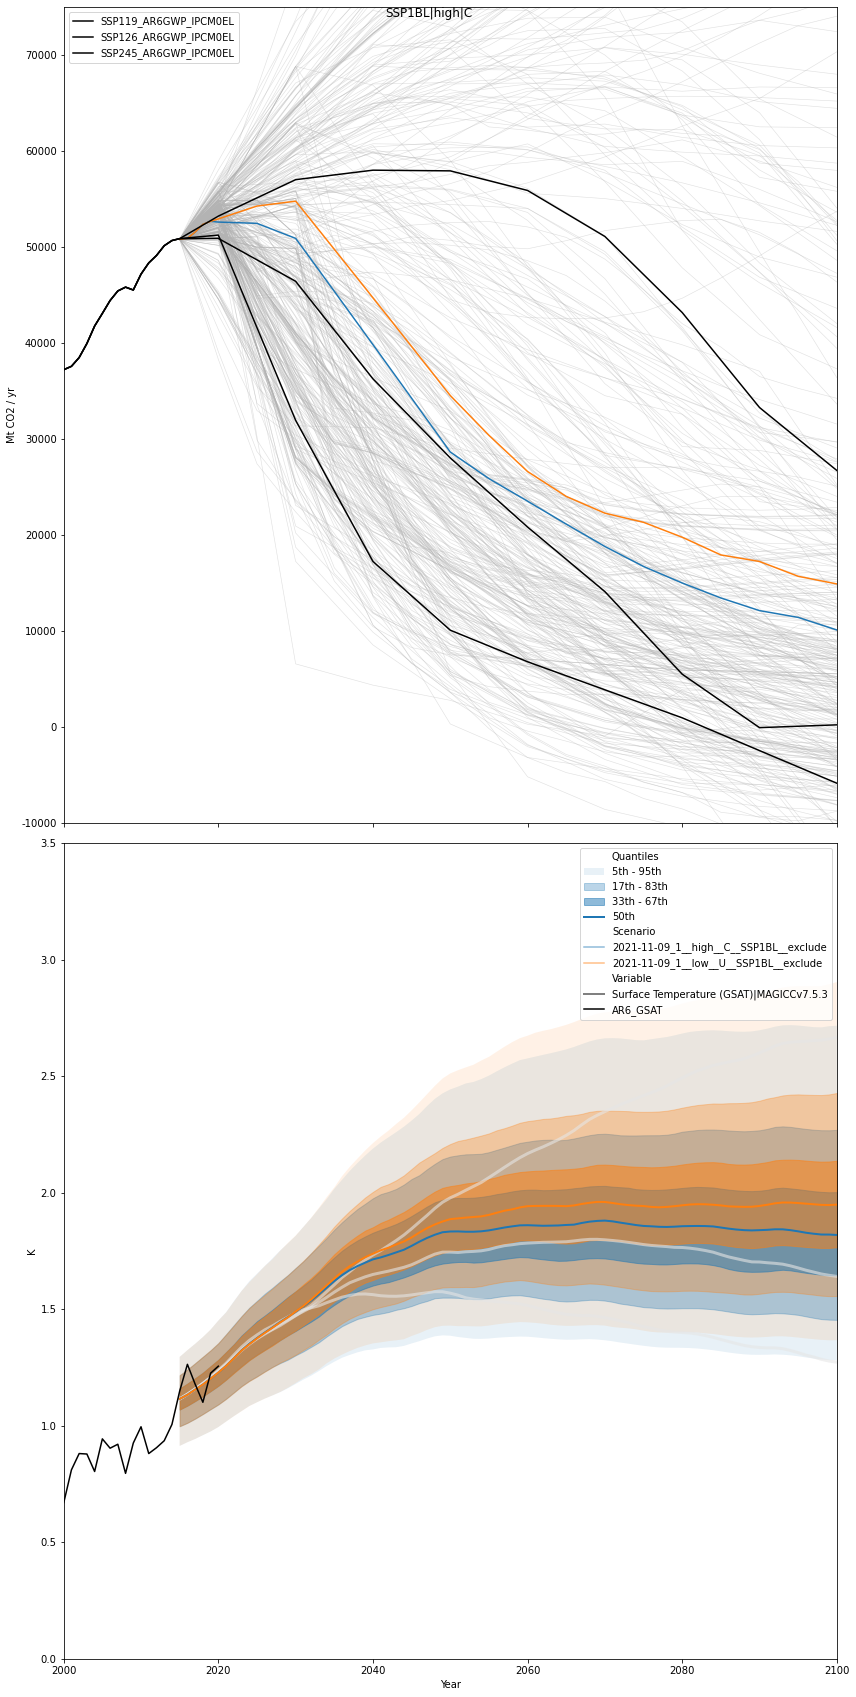

<IPython.core.display.Javascript object>

In [37]:
axs = plt.figure(figsize=(12, 24)).subplots(2, sharex=True)
plt.suptitle("SSP1BL|high|C")

filters = {
    "scenario": [
        "2021-11-09_1__low__U__SSP1BL__exclude",
        "2021-11-09_1__high__C__SSP1BL__exclude",
    ],
    "year": range(2015, 2101),
}
lineplot_kwargs = {"hue": "scenario"}
plume_kwargs = {
    "hue_var": "scenario",
    "quantiles_plumes": [
        ((0.05, 0.95), 0.1),
        ((0.16699999999999998, 0.833), 0.3),
        ((0.33, 0.67), 0.5),
        ((0.5,), 1.0),
    ],
}


sr15_data_cleaned.filter(variable="Emissions|GHG excl CO2 AFOLU (AR6GWP100)").lineplot(
    ax=axs[0], **pkwargs, time_axis="year"
)
extended_emissions.filter(**filters).lineplot(
    ax=axs[0], **lineplot_kwargs, legend=False, time_axis="year"
)

ssp_data.plot(ax=axs[0],x="Unnamed: 0",y="SSP119_AR6GWP_IPCM0EL", color = "black")
ssp_data.plot(ax=axs[0],x="Unnamed: 0",y="SSP126_AR6GWP_IPCM0EL", color = "black")
ssp_data.plot(ax=axs[0],x="Unnamed: 0",y="SSP245_AR6GWP_IPCM0EL", color = "black")

axs[0].set_ylim(-10000, 75000)
axs[0].set_xlim(2000, 2100)


sr15_rcmip_data.filter(
    variable="Surface Temperature", quantile=0.5, year=filters["year"]
).lineplot(ax=axs[1], **ssp_pkwargs, time_axis="year")
results_cleaned.filter(
    variable="Surface Temperature (GSAT)|MAGICCv7.5.3",
    **filters,
).plumeplot(ax=axs[1], pre_calculated=True, **plume_kwargs, time_axis="year")



ar6gsat_data.plot(ax=axs[1],x="Year",y="AR6_GSAT", color = "black")


axs[1].set_ylim(0, 3.5)
axs[1].set_xlim(2000, 2100)
plt.tight_layout()
plt.savefig(os.path.join(PROCESSED_DATA_DIR, "20211117_low_and_high.pdf"))




Filtered ScmRun is empty!
Stack (most recent call last):
  File "/data/ubuntu-znicholls/miniconda3/envs/unfccc-ndc/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/data/ubuntu-znicholls/miniconda3/envs/unfccc-ndc/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/data/ubuntu-znicholls/miniconda3/envs/unfccc-ndc/lib/python3.9/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/data/ubuntu-znicholls/miniconda3/envs/unfccc-ndc/lib/python3.9/site-packages/traitlets/config/application.py", line 845, in launch_instance
    app.start()
  File "/data/ubuntu-znicholls/miniconda3/envs/unfccc-ndc/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 667, in start
    self.io_loop.start()
  File "/data/ubuntu-znicholls/miniconda3/envs/unfccc-ndc/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 199, in start
    self.asyncio_loop.run_forev

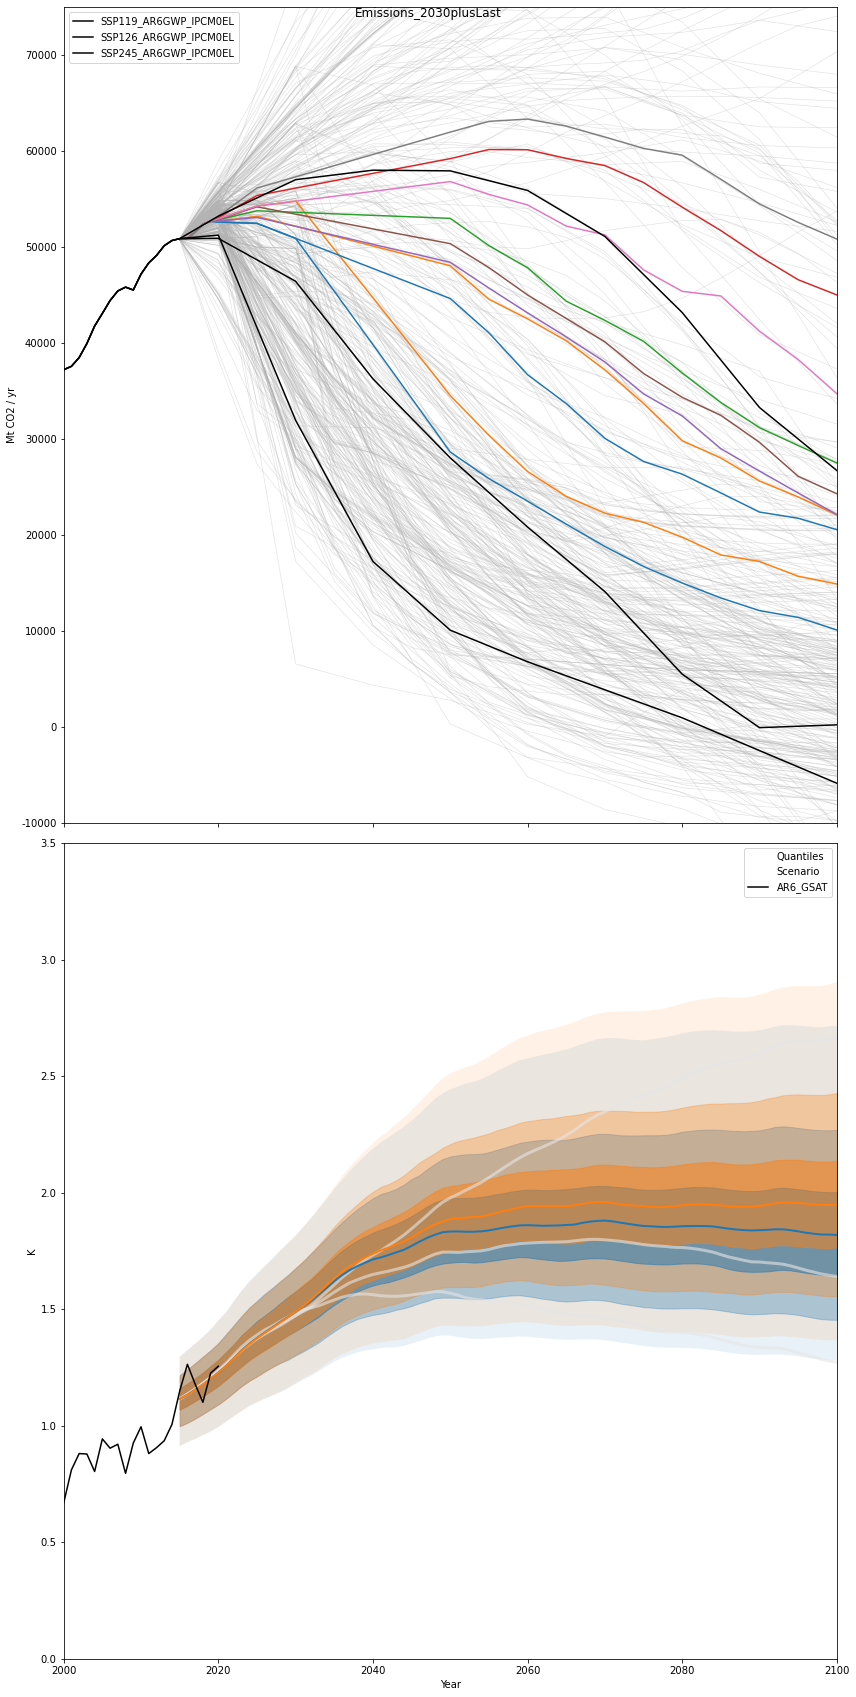

<IPython.core.display.Javascript object>

In [38]:
axs = plt.figure(figsize=(12, 24)).subplots(2, sharex=True)
plt.suptitle("Emissions_2030plusLast")

filters = {
    "scenario": [
        "2021-11-09_1__low__U__SSP1BL__exclude",
        "2021-11-09_1__high__C__SSP1BL__exclude",
    ],
    "year": range(2015, 2101),
}

filters2030 = {
    "country_extension": "2030",
    "pathway_id": "2021-11-09_1",
    "year": range(2015, 2101),
}

lineplot_kwargs = {"hue": "scenario"}
plume_kwargs = {
    "hue_var": "scenario",
    "quantiles_plumes": [
        ((0.05, 0.95), 0.1),
        ((0.16699999999999998, 0.833), 0.3),
        ((0.33, 0.67), 0.5),
        ((0.5,), 1.0),
    ],
}


sr15_data_cleaned.filter(variable="Emissions|GHG excl CO2 AFOLU (AR6GWP100)").lineplot(
    ax=axs[0], **pkwargs, time_axis="year"
)
extended_emissions.filter(**filters).lineplot(
    ax=axs[0], **lineplot_kwargs, legend=False, time_axis="year"
)

extended_emissions.filter(**filters2030).lineplot(
    ax=axs[0], **lineplot_kwargs, legend=False, time_axis="year"
)


ssp_data.plot(ax=axs[0],x="Unnamed: 0",y="SSP119_AR6GWP_IPCM0EL", color = "black")
ssp_data.plot(ax=axs[0],x="Unnamed: 0",y="SSP126_AR6GWP_IPCM0EL", color = "black")
ssp_data.plot(ax=axs[0],x="Unnamed: 0",y="SSP245_AR6GWP_IPCM0EL", color = "black")

axs[0].set_ylim(-10000, 75000)
axs[0].set_xlim(2000, 2100)


sr15_rcmip_data.filter(
    variable="Surface Temperature", quantile=0.5, year=filters["year"]
).lineplot(ax=axs[1], **ssp_pkwargs, time_axis="year")
results_cleaned.filter(
    variable="Surface Temperature (GSAT)|MAGICCv7.5.3",
    **filters,
).plumeplot(ax=axs[1], pre_calculated=True, **plume_kwargs, time_axis="year")

results_cleaned.filter(
    variable="Surface Temperature (GSAT)|MAGICCv7.5.3",
    **filters2030,
).plumeplot(ax=axs[1], pre_calculated=True, **plume_kwargs, time_axis="year")


ar6gsat_data.plot(ax=axs[1],x="Year",y="AR6_GSAT", color = "black")


axs[1].set_ylim(0, 3.5)
axs[1].set_xlim(2000, 2100)
plt.tight_layout()
plt.savefig(os.path.join(PROCESSED_DATA_DIR, "20211117_low_and_high_AND_2030_emissions.pdf"))




In [39]:
results_cleaned.get_unique_meta("variable")

['Atmospheric Concentrations|CH4|MAGICCv7.5.3',
 'Atmospheric Concentrations|CO2|MAGICCv7.5.3',
 'Atmospheric Concentrations|N2O|MAGICCv7.5.3',
 'Effective Radiative Forcing|Aerosols|Direct Effect|BC|MAGICCv7.5.3',
 'Effective Radiative Forcing|Aerosols|Direct Effect|MAGICCv7.5.3',
 'Effective Radiative Forcing|Aerosols|Direct Effect|OC|MAGICCv7.5.3',
 'Effective Radiative Forcing|Aerosols|Direct Effect|Sulfur|MAGICCv7.5.3',
 'Effective Radiative Forcing|Aerosols|Indirect Effect|MAGICCv7.5.3',
 'Effective Radiative Forcing|Aerosols|MAGICCv7.5.3',
 'Effective Radiative Forcing|Basket|Anthropogenic|MAGICCv7.5.3',
 'Effective Radiative Forcing|Basket|Greenhouse Gases|MAGICCv7.5.3',
 'Effective Radiative Forcing|Basket|Non-CO2 Anthropogenic|MAGICCv7.5.3',
 'Effective Radiative Forcing|Basket|Non-CO2 Greenhouse Gases|MAGICCv7.5.3',
 'Effective Radiative Forcing|C2F6|MAGICCv7.5.3',
 'Effective Radiative Forcing|C6F14|MAGICCv7.5.3',
 'Effective Radiative Forcing|CF4|MAGICCv7.5.3',
 'Effective

<IPython.core.display.Javascript object>

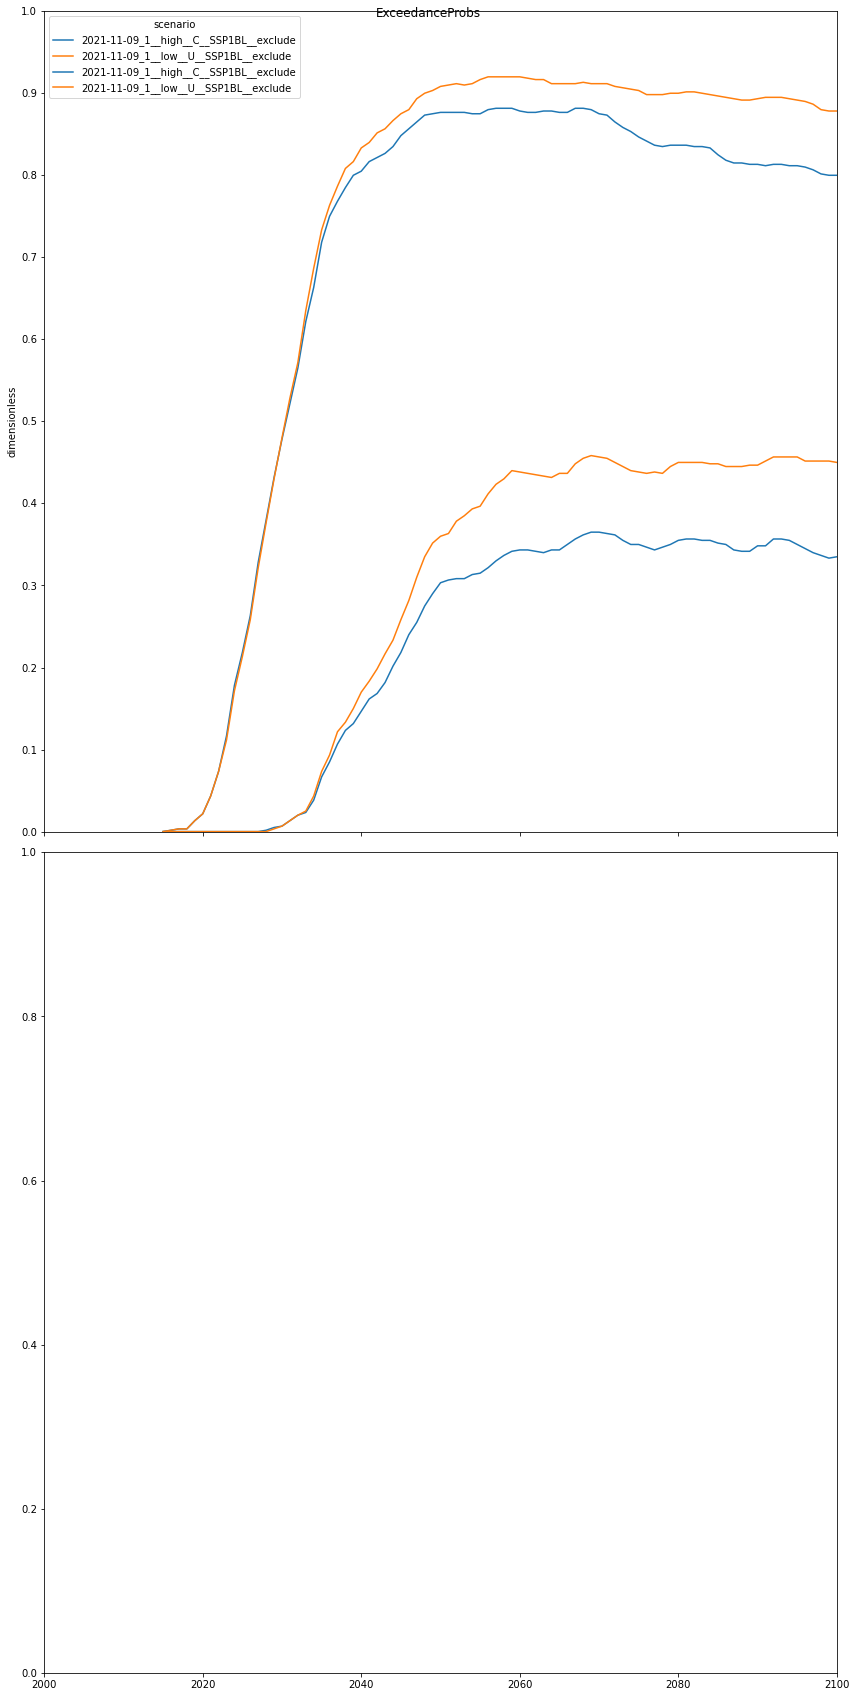

<IPython.core.display.Javascript object>

In [40]:
axs = plt.figure(figsize=(12, 24)).subplots(2, sharex=True)
plt.suptitle("ExceedanceProbs")

filters = {
    "scenario": [
        "2021-11-09_1__low__U__SSP1BL__exclude",
        "2021-11-09_1__high__C__SSP1BL__exclude",
    ],
    "year": range(2015, 2101),
}

filters2030 = {
    "country_extension": "2030",
    "pathway_id": "2021-11-09_1",
    "year": range(2015, 2101),
}

lineplot_kwargs = {"hue": "scenario"}
plume_kwargs = {
    "hue_var": "scenario",
    "quantiles_plumes": [
        ((0.05, 0.95), 0.1),
        ((0.16699999999999998, 0.833), 0.3),
        ((0.33, 0.67), 0.5),
        ((0.5,), 1.0),
    ],
}



results_cleaned.filter(
    variable="Exceedance Probability 1.5C|MAGICCv7.5.3",
    **filters,
).lineplot(ax=axs[0],  **lineplot_kwargs, time_axis="year")

results_cleaned.filter(
    variable="Exceedance Probability 2.0C|MAGICCv7.5.3",
    **filters,
).lineplot(ax=axs[0],  **lineplot_kwargs, time_axis="year")


axs[0].set_ylim(0, 1)
axs[0].set_xlim(2000, 2100)
axs[0].set_yticks(ticks= np.arange(0,1.05,0.1))

plt.tight_layout()
plt.savefig(os.path.join(PROCESSED_DATA_DIR, "20211117_ExceedanceProbs.pdf"))




In [41]:
ssp_data

,Unnamed: 0,SSP126_AR6GWP_KyotoGHG,SSP126_AR6GWP_CO2LULUCF,SSP126_AR6GWP_IPCM0EL,SSP119_AR6GWP_KyotoGHG,SSP119_AR6GWP_CO2LULUCF,SSP119_AR6GWP_IPCM0EL,SSP245_AR6GWP_KyotoGHG,SSP245_AR6GWP_CO2LULUCF,SSP245_AR6GWP_IPCM0EL,SSP126_CH4,SSP119_CH4,SSP245_CH4
0,1750,861.180591,297.464607,563.715984,861.180591,297.464607,563.715984,861.180591,297.464607,563.715984,19.019783,19.019783,19.019783
1,1751,864.176682,302.937098,561.239584,864.176682,302.937098,561.239584,864.176682,302.937098,561.239584,18.915109,18.915109,18.915109
2,1752,869.497363,308.510269,560.987094,869.497363,308.510269,560.987094,869.497363,308.510269,560.987094,18.889712,18.889712,18.889712
3,1753,882.097462,314.185969,567.911493,882.097462,314.185969,567.911493,882.097462,314.185969,567.911493,19.121377,19.121377,19.121377
4,1754,899.167288,319.966086,579.201202,899.167288,319.966086,579.201202,899.167288,319.966086,579.201202,19.509061,19.509061,19.509061
...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,2096,-2499.742712,-2573.249100,73.506388,-6854.572334,-2318.036529,-4536.535805,24723.275870,-4606.868575,29330.144440,125.369515,115.338965,296.618492
347,2097,-2552.092081,-2654.863007,102.770926,-7211.117885,-2333.918335,-4877.199550,24017.147620,-4655.269856,28672.417470,124.574342,114.432678,296.251351
348,2098,-2604.298418,-2736.253924,131.955507,-7566.689268,-2349.756749,-5216.932519,23312.948680,-4703.538894,28016.487570,123.781342,113.528868,295.885213
349,2099,-2656.504755,-2817.644842,161.140087,-7922.260651,-2365.595162,-5556.665489,22608.749740,-4751.807932,27360.557670,122.988343,112.625057,295.519075


<IPython.core.display.Javascript object>

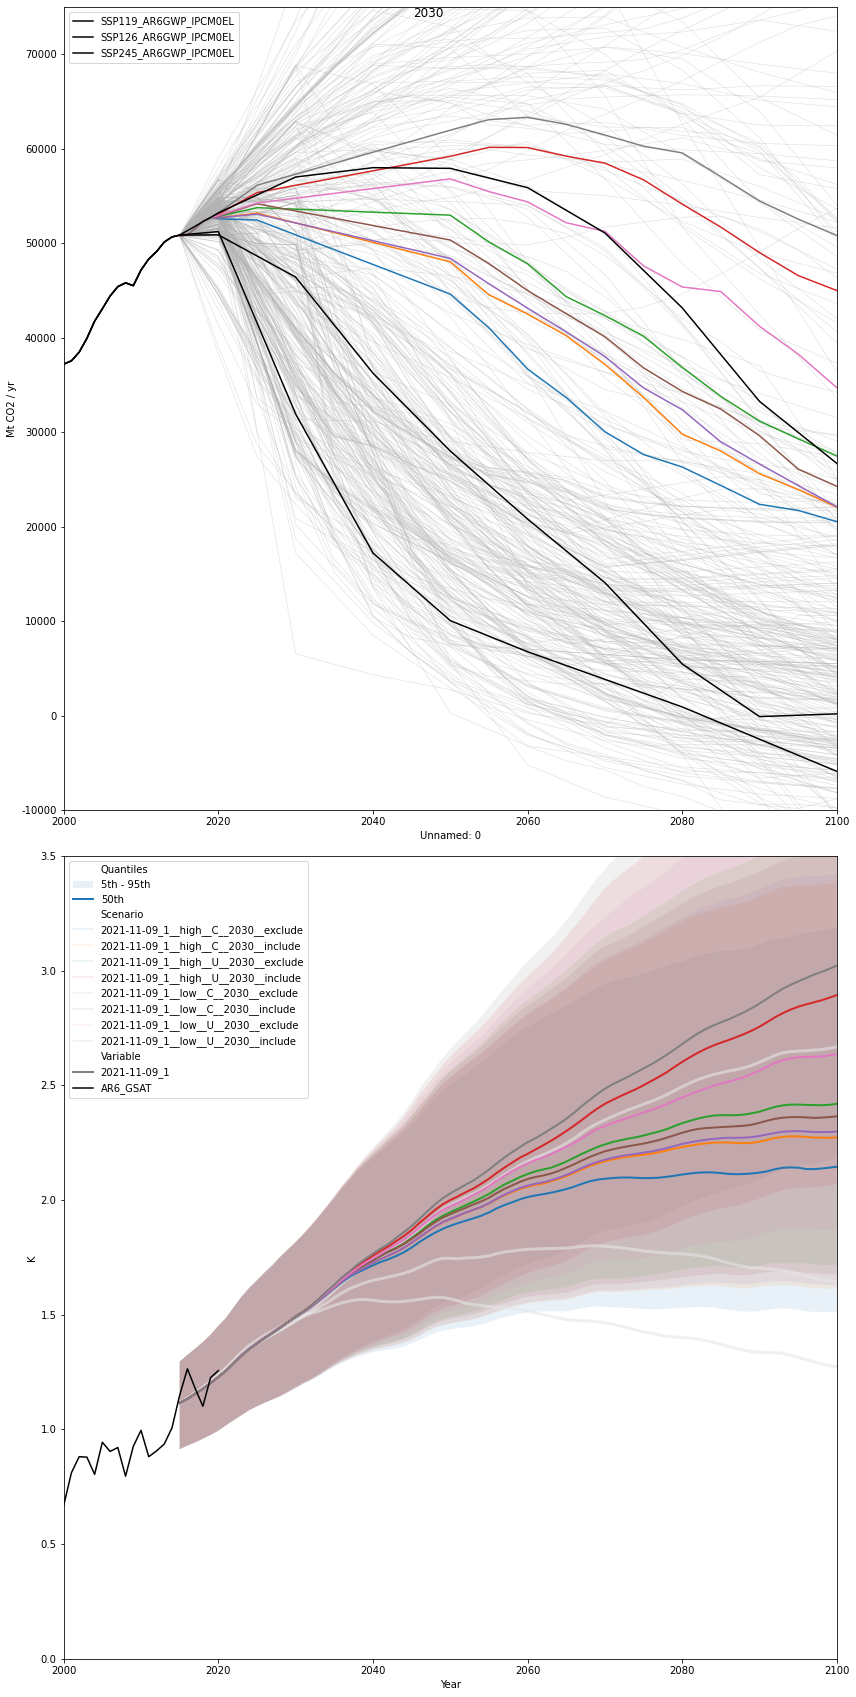

<IPython.core.display.Javascript object>

In [42]:
axs = plt.figure(figsize=(12, 24)).subplots(2)
plt.suptitle("2030")

filters = {
    "country_extension": "2030",
    "pathway_id": "2021-11-09_1",
    "year": range(2015, 2101),
}
lineplot_kwargs = {"hue": "scenario", "style": "pathway_id"}
plume_kwargs = {
    "hue_var": "scenario",
    "style_var": "pathway_id",
    "quantiles_plumes": [((0.05, 0.95), 0.1), ((0.5,), 1.0)],
}


sr15_data_cleaned.filter(variable="Emissions|GHG excl CO2 AFOLU (AR6GWP100)").lineplot(
    ax=axs[0], **pkwargs, time_axis="year"
)
extended_emissions.filter(**filters).lineplot(
    ax=axs[0], **lineplot_kwargs, legend=False, time_axis="year"
)

#ssp_data_dates = ssp_data["Unnamed: 0"].to_datetime(format="%Y%m")  # make a datetime

ssp_data.plot(ax=axs[0],x="Unnamed: 0",y="SSP119_AR6GWP_IPCM0EL", color = "black")
ssp_data.plot(ax=axs[0],x="Unnamed: 0",y="SSP126_AR6GWP_IPCM0EL", color = "black")
ssp_data.plot(ax=axs[0],x="Unnamed: 0",y="SSP245_AR6GWP_IPCM0EL", color = "black")

axs[0].set_ylim(-10000, 75000)
axs[0].set_xlim(2000, 2100)



sr15_rcmip_data.filter(
    variable="Surface Temperature", quantile=0.5, year=filters["year"]
).lineplot(ax=axs[1], **ssp_pkwargs, time_axis="year")
results_sensitivity.filter(
    variable="Surface Temperature (GSAT)|MAGICCv7.5.3",
    **filters,
).plumeplot(ax=axs[1], pre_calculated=True, **plume_kwargs, time_axis="year")




ar6gsat_data.plot(ax=axs[1],x="Year",y="AR6_GSAT", color="black")


axs[1].set_ylim(0, 3.5)
axs[1].set_xlim(2000, 2100)
plt.tight_layout()
plt.savefig(os.path.join(PROCESSED_DATA_DIR, "20211117_2030_extension.pdf"))



In [43]:
results_sensitivity.filter(scenario="2021-11-03_1__high__C__SSP1BL__exclude*")

<scmdata.ScmRun (timeseries: 1335, timepoints: 106)>
Time:
	Start: 1995-01-01T00:00:00
	End: 2100-01-01T00:00:00
Meta:
	     ambition conditionality exclude_hot_air extension   methane_pledges  \
	16       high              C         exclude    SSP1BL    conditionalCH4   
	17       high              C         exclude    SSP1BL           fullCH4   
	18       high              C         exclude    SSP1BL  unconditionalCH4   
	35       high              C         exclude    SSP1BL    conditionalCH4   
	36       high              C         exclude    SSP1BL           fullCH4   
	...       ...            ...             ...       ...               ...   
	8434     high              C         exclude    SSP1BL           fullCH4   
	8435     high              C         exclude    SSP1BL  unconditionalCH4   
	8452     high              C         exclude    SSP1BL    conditionalCH4   
	8453     high              C         exclude    SSP1BL           fullCH4   
	8454     high              C     

<IPython.core.display.Javascript object>

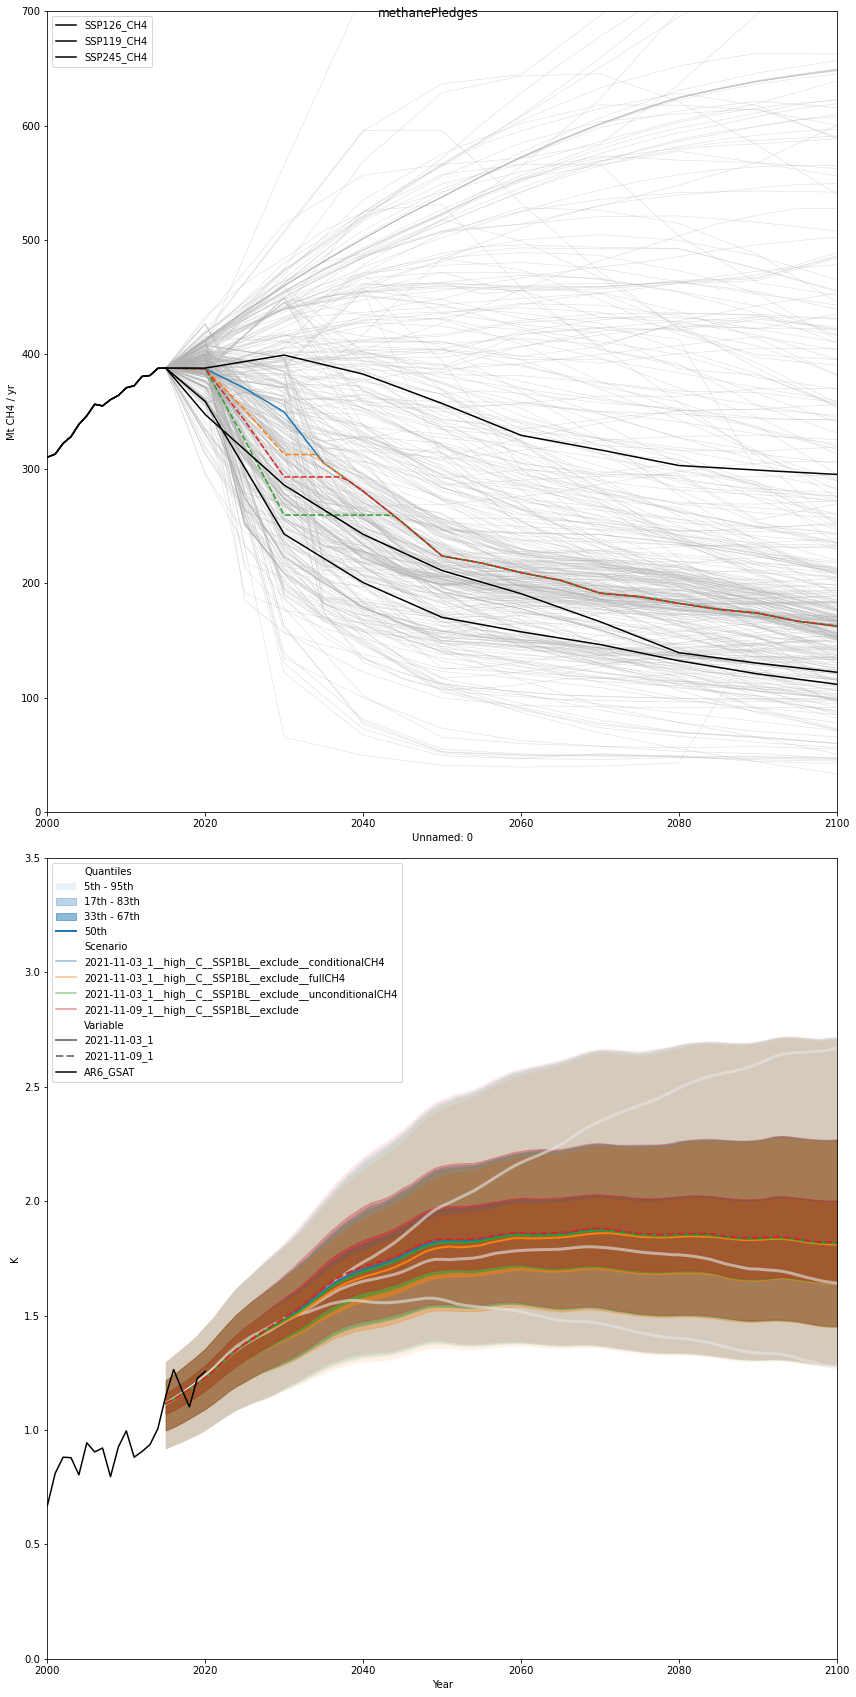

<IPython.core.display.Javascript object>

In [44]:
axs = plt.figure(figsize=(12, 24)).subplots(2)
plt.suptitle("methanePledges")

filters = {
    "scenario": [
        "2021-11-03_1__high__C__SSP1BL__exclude*",
        "2021-11-09_1__high__C__SSP1BL__exclude",
    ],
    "year": range(2015, 2101),
}
lineplot_kwargs = {"hue": "scenario", "style": "pathway_id"}
plume_kwargs = {
    "hue_var": "scenario",
    "style_var": "pathway_id",
    "quantiles_plumes": [
        ((0.05, 0.95), 0.1),
        ((0.16699999999999998, 0.833), 0.3),
        ((0.33, 0.67), 0.5),
        ((0.5,), 1.0),
    ],
}


sr15_data_cleaned.filter(variable="Emissions|CH4").lineplot(
    ax=axs[0], **pkwargs, time_axis="year"
)
results_sensitivity.filter(**filters, variable="Infilled|Emissions|CH4").lineplot(
    ax=axs[0], **lineplot_kwargs, legend=False, time_axis="year"
)

ssp_data.plot(ax=axs[0], x="Unnamed: 0", y="SSP126_CH4", color="black")
ssp_data.plot(ax=axs[0], x="Unnamed: 0", y="SSP119_CH4", color="black")
ssp_data.plot(ax=axs[0], x="Unnamed: 0", y="SSP245_CH4", color="black")


axs[0].set_ylim(0, 700)
axs[0].set_xlim(2000, 2100)


sr15_rcmip_data.filter(
    variable="Surface Temperature", quantile=0.5, year=filters["year"]
).lineplot(ax=axs[1], **ssp_pkwargs, time_axis="year")
results_sensitivity.filter(
    variable="Surface Temperature (GSAT)|MAGICCv7.5.3",
    **filters,
).plumeplot(ax=axs[1], pre_calculated=True, **plume_kwargs, time_axis="year")

ar6gsat_data.plot(ax=axs[1], x="Year", y="AR6_GSAT", color="black")


axs[1].set_ylim(0, 3.5)
axs[1].set_xlim(2000, 2100)

plt.tight_layout()
plt.savefig(os.path.join(PROCESSED_DATA_DIR, "20211117_methane_extension.pdf"))

In [45]:
results_cleaned.head()

time                                                                                                                                                                                                                           1995-01-01  \
ambition conditionality exclude_hot_air extension methane_pledges model         pathway_id   quantile region scenario                               scenario_without_pathway unit variable                                                  
high     C              exclude         SSP1BL    NaN             NDC Factsheet 2021-10-18_1 0.100    World  2021-10-18_1__high__C__SSP1BL__exclude high__C__SSP1BL__exclude ppb  Atmospheric Concentrations|CH4|MAGICCv7.5.3     1755.23   
                                                                                             0.167    World  2021-10-18_1__high__C__SSP1BL__exclude high__C__SSP1BL__exclude ppb  Atmospheric Concentrations|CH4|MAGICCv7.5.3     1755.23   
                                                                                             0.330    World  2021-10-18_1__high__C__SSP1BL__exclude high__C__SSP1BL__exclude ppb  Atmospheric Concentrations|CH4|MAGICCv7.5.3     1755.23   
                                                                                             0.050    World  2021-10-18_1__high__C__SSP1BL__exclude high__C__SSP1BL__exclude ppb  Atmospheric Concentrations|CH4|MAGICCv7.5.3     1755.23   
                                                                                             0.500    World  2021-10-18_1__high__C__SSP1BL__exclude high__C__SSP1BL__exclude ppb  Atmospheric Concentrations|CH4|MAGICCv7.5.3     1755.23   

time                                                                                                                                                                                                                           1996-01-01  \
ambition conditionality exclude_hot_air extension methane_pledges model         pathway_id   quantile region scenario                               scenario_without_pathway unit variable                                                  
high     C              exclude         SSP1BL    NaN             NDC Factsheet 2021-10-18_1 0.100    World  2021-10-18_1__high__C__SSP1BL__exclude high__C__SSP1BL__exclude ppb  Atmospheric Concentrations|CH4|MAGICCv7.5.3     1757.19   
                                                                                             0.167    World  2021-10-18_1__high__C__SSP1BL__exclude high__C__SSP1BL__exclude ppb  Atmospheric Concentrations|CH4|MAGICCv7.5.3     1757.19   
                                                                                             0.330    World  2021-10-18_1__high__C__SSP1BL__exclude high__C__SSP1BL__exclude ppb  Atmospheric Concentrations|CH4|MAGICCv7.5.3     1757.19   
                                                                                             0.050    World  2021-10-18_1__high__C__SSP1BL__exclude high__C__SSP1BL__exclude ppb  Atmospheric Concentrations|CH4|MAGICCv7.5.3     1757.19   
                                                                                             0.500    World  2021-10-18_1__high__C__SSP1BL__exclude high__C__SSP1BL__exclude ppb  Atmospheric Concentrations|CH4|MAGICCv7.5.3     1757.19   

time                                                                                                                                                                                                                           1997-01-01  \
ambition conditionality exclude_hot_air extension methane_pledges model         pathway_id   quantile region scenario                               scenario_without_pathway unit variable                                                  
high     C              exclude         SSP1BL    NaN             NDC Factsheet 2021-10-18_1 0.100    World  2021-10-18_1__high__C__SSP1BL__exclude high__C__SSP1BL__exclude ppb  Atmospheric Concentrations|C

<IPython.core.display.Javascript object>

# Table

In [68]:
len(extended_subset.get_unique_meta("scenario"))

16

<IPython.core.display.Javascript object>

In [54]:
temp = results_sensitivity.copy()
temp.head()

time                                                                                                                                                                                                                    1995-01-01  \
ambition conditionality country_extension exclude_hot_air extension methane_pledges model         pathway_id   quantile region scenario                               unit variable                                                  
high     C              2030              exclude         2030      NaN             NDC Factsheet 2021-11-09_1 0.1      World  2021-11-09_1__high__C__2030__exclude   ppb  Atmospheric Concentrations|CH4|MAGICCv7.5.3     1755.23   
                                          include         2030      NaN             NDC Factsheet 2021-11-09_1 0.1      World  2021-11-09_1__high__C__2030__include   ppb  Atmospheric Concentrations|CH4|MAGICCv7.5.3     1755.23   
                        SSP1BL            exclude         SSP1BL    NaN             NDC Factsheet 2021-11-09_1 0.1      World  2021-11-09_1__high__C__SSP1BL__exclude ppb  Atmospheric Concentrations|CH4|MAGICCv7.5.3     1755.23   
                                          include         SSP1BL    NaN             NDC Factsheet 2021-11-09_1 0.1      World  2021-11-09_1__high__C__SSP1BL__include ppb  Atmospheric Concentrations|CH4|MAGICCv7.5.3     1755.23   
         U              2030              exclude         2030      NaN             NDC Factsheet 2021-11-09_1 0.1      World  2021-11-09_1__high__U__2030__exclude   ppb  Atmospheric Concentrations|CH4|MAGICCv7.5.3     1755.23   

time                                                                                                                                                                                                                    1996-01-01  \
ambition conditionality country_extension exclude_hot_air extension methane_pledges model         pathway_id   quantile region scenario                               unit variable                                                  
high     C              2030              exclude         2030      NaN             NDC Factsheet 2021-11-09_1 0.1      World  2021-11-09_1__high__C__2030__exclude   ppb  Atmospheric Concentrations|CH4|MAGICCv7.5.3     1757.19   
                                          include         2030      NaN             NDC Factsheet 2021-11-09_1 0.1      World  2021-11-09_1__high__C__2030__include   ppb  Atmospheric Concentrations|CH4|MAGICCv7.5.3     1757.19   
                        SSP1BL            exclude         SSP1BL    NaN             NDC Factsheet 2021-11-09_1 0.1      World  2021-11-09_1__high__C__SSP1BL__exclude ppb  Atmospheric Concentrations|CH4|MAGICCv7.5.3     1757.19   
                                          include         SSP1BL    NaN             NDC Factsheet 2021-11-09_1 0.1      World  2021-11-09_1__high__C__SSP1BL__include ppb  Atmospheric Concentrations|CH4|MAGICCv7.5.3     1757.19   
         U              2030              exclude         2030      NaN             NDC Factsheet 2021-11-09_1 0.1      World  2021-11-09_1__high__U__2030__exclude   ppb  Atmospheric Concentrations|CH4|MAGICCv7.5.3     1757.19   

time                                                                                                                                                                                                                    1997-01-01  \
ambition conditionality country_extension exclude_hot_air extension methane_pledges model         pathway_id   quantile region scenario                               unit variable                                                  
high     C              2030              exclude         2030      NaN             NDC Factsheet 2021-11-09_1 0.1      World  2021-11-09_1__high__C__2030__exclude   ppb  Atmospheric Concentrations|CH4|MAGICCv7.5.3      1761.5   
                                          include         2030      NaN             NDC 

<IPython.core.display.Javascript object>

In [228]:
output = scmdata.run_append(
    [
        extended_subset.filter(),
        temp.filter(quantile=[0.05, 0.5, 0.95]),
        temp.filter(variable="Infilled|*"),
    ]
).drop_meta(
    [
        "global_extension",
        "pathway_num",
        "pathway_id",
        "pathway_num_today",
        "date",
        "last_country",
        "scenario_without_pathway",
        "country_extension",
        "stage",
    ]
)

<IPython.core.display.Javascript object>

In [229]:
output.get_unique_meta("scenario")

['2021-11-09_1__high__C__2030__exclude',
 '2021-11-09_1__high__C__2030__include',
 '2021-11-09_1__high__C__SSP1BL__exclude',
 '2021-11-09_1__high__C__SSP1BL__include',
 '2021-11-09_1__high__U__2030__exclude',
 '2021-11-09_1__high__U__2030__include',
 '2021-11-09_1__high__U__SSP1BL__exclude',
 '2021-11-09_1__high__U__SSP1BL__include',
 '2021-11-09_1__low__C__2030__exclude',
 '2021-11-09_1__low__C__2030__include',
 '2021-11-09_1__low__C__SSP1BL__exclude',
 '2021-11-09_1__low__C__SSP1BL__include',
 '2021-11-09_1__low__U__2030__exclude',
 '2021-11-09_1__low__U__2030__include',
 '2021-11-09_1__low__U__SSP1BL__exclude',
 '2021-11-09_1__low__U__SSP1BL__include',
 '2021-11-03_1__high__C__SSP1BL__exclude__conditionalCH4',
 '2021-11-03_1__high__C__SSP1BL__exclude__fullCH4',
 '2021-11-03_1__high__C__SSP1BL__exclude__unconditionalCH4']

<IPython.core.display.Javascript object>

In [237]:
output_for_table = scmdata.run_append(
    [
        output.filter(
            variable=[
                "Emissions|GHG excl CO2 AFOLU (AR6GWP100)",
                "Surface Temperature (GSAT)|MAGICCv7.5.3",
            ]
        ),
        output.filter(
            methane_pledges="*CH4",
            variable=[
                "Infilled|Emissions|CH4",
            ],
        ),
    ]
).filter(year=range(2015, 2101))
output_for_table.timeseries().sort_index().round(3).to_csv(
    "timeseries_figure_3_{}.csv".format(NDC_TARGET_RELEASE)
)

<IPython.core.display.Javascript object>

# Check GHG equiv

In [85]:
def strip(u):
    return u.replace("-equiv", "")


results_sensitivity["unit"] = results_sensitivity["unit"].apply(strip)

<IPython.core.display.Javascript object>

In [143]:
magicc_ghg = results_sensitivity.filter(
    variable="Infilled|Emissions|Kyoto Gases (AR6-GWP100)"
).subtract(
    results_sensitivity.filter(variable="Infilled|Emissions|CO2|AFOLU"),
    op_cols={"variable": "Emissions|GHG excl CO2 AFOLU (AR6GWP100)"},
)
magicc_ghg["stage"] = "magicc"

<IPython.core.display.Javascript object>

In [145]:
magicc_ghg = results_sensitivity.filter(
    variable="Infilled|Emissions|Kyoto Gases (AR6-GWP100)"
).subtract(
    results_sensitivity.filter(variable="Infilled|Emissions|CO2|AFOLU"),
    op_cols={"variable": "Emissions|GHG excl CO2 AFOLU (AR6GWP100)"},
)
magicc_ghg["stage"] = "magicc"
magicc_ghg = magicc_ghg.filter(pathway_id="2021-11-09_1")

extended_ghg = extended_emissions.filter(date="2021-11-09")
extended_ghg["stage"] = "extended"

ghg_emis = (
    scmdata.run_append([magicc_ghg, extended_ghg])
    .filter(year=range(2020, 2101))
    .drop_meta(
        [
            "global_extension",
            "pathway_num",
            "pathway_id",
            "pathway_num_today",
            "date",
            "last_country",
            "methane_pledges",
            "scenario_without_pathway",
        ]
    )
)

<IPython.core.display.Javascript object>

In [147]:
def calc_cum_emis(emis, zero_year=2020):
    cum_emissions = emis.integrate().relative_to_ref_period_mean(year=zero_year)

    return cum_emissions.convert_unit("Gt CO2")


cum_ghg_emis = calc_cum_emis(ghg_emis)

<IPython.core.display.Javascript object>

In [148]:
df = cum_ghg_emis.filter(year=2100).timeseries()

<IPython.core.display.Javascript object>

In [198]:
df_2 = df.unstack("stage").sort_index()
df_2.index = df_2.index.droplevel(
    level=list(
        set(df_2.index.names)
        - {"ambition", "conditionality", "country_extension", "exclude_hot_air"}
    )
)
df_2.columns = df_2.columns.get_level_values("stage")
df_2

stage                                                         extended  \
ambition conditionality country_extension exclude_hot_air                
high     C              2030              exclude          2958.870684   
                                          include          3233.281543   
                        SSP1BL            exclude          2203.203938   
                                          include          2299.481291   
         U              2030              exclude          3582.317445   
                                          include          4445.167841   
                        SSP1BL            exclude          2338.067188   
                                          include          2554.793564   
low      C              2030              exclude          3282.374784   
                                          include          3435.338324   
                        SSP1BL            exclude          2360.729828   
                                          include          2472.383597   
         U              2030              exclude          4039.054474   
                                          include          4704.410777   
                        SSP1BL            exclude          2533.325252   
                                          include          2799.012364   

stage                                                           magicc  
ambition conditionality country_extension exclude_hot_air               
high     C              2030              exclude          2802.531790  
                                          include          3093.682818  
                        SSP1BL            exclude          2109.006301  
                                          include          2192.164353  
         U              2030              exclude          3412.611067  
                                          include          4347.267318  
                        SSP1BL            exclude          2228.887774  
                                          include          2408.742605  
low      C              2030              exclude          3141.195780  
                                          include          3284.128734  
                        SSP1BL            exclude          2241.934204  
                                          include          2335.848205  
         U              2030              exclude          3849.724545  
                                          include          4640.900370  
                        SSP1BL            exclude          2389.062961  
                                          include          2631.636887

<IPython.core.display.Javascript object>

In [199]:
df_pct_change = df_2.pct_change(axis=1).iloc[:, -1]
df_pct_change.name = "pct_change"
df_pct_change

ambition  conditionality  country_extension  exclude_hot_air
high      C               2030               exclude           -0.052837
                                             include           -0.043176
                          SSP1BL             exclude           -0.042755
                                             include           -0.046670
          U               2030               exclude           -0.047373
                                             include           -0.022024
                          SSP1BL             exclude           -0.046696
                                             include           -0.057167
low       C               2030               exclude           -0.043011
                                             include           -0.044016
                          SSP1BL             exclude           -0.050322
                                             include           -0.055224
          U               2030               exclude           

<IPython.core.display.Javascript object>

In [204]:
df_merged = pd.merge(df_2, df_pct_change.to_frame(), left_index=True, right_index=True)
df_merged["variable"] = "Cumulative Emissions|Kyoto GHG excl. AFOLU (AR6GWP100)"
df_merged.set_index("variable", append=True).to_csv("cumGHG_pct_change_{}.csv".format(NDC_TARGET_RELEASE))

<IPython.core.display.Javascript object>

(0.0, 60000.0)

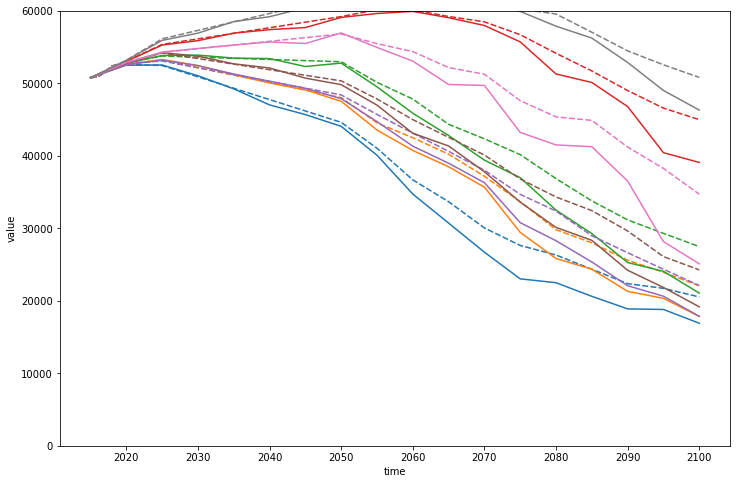

<IPython.core.display.Javascript object>

In [110]:
scmdata.run_append(
    [
        results_sensitivity.filter(
            variable="Infilled|Emissions|Kyoto Gases (AR6-GWP100)", country_extension="2030"
        ).subtract(
            results_sensitivity.filter(
                variable="Infilled|Emissions|CO2|AFOLU", country_extension="2030"
            ),
            op_cols={"variable": "Emissions|Kyoto Gases excl. AFOLU(AR6-GWP100)"},
        ),
        extended_emissions.filter(date="2021-11-09", country_extension="2030"),
    ]
).lineplot(legend=False, style="variable")
plt.gca().set_ylim((0, 60000))

<AxesSubplot:xlabel='time', ylabel='Mt CO2 / yr'>

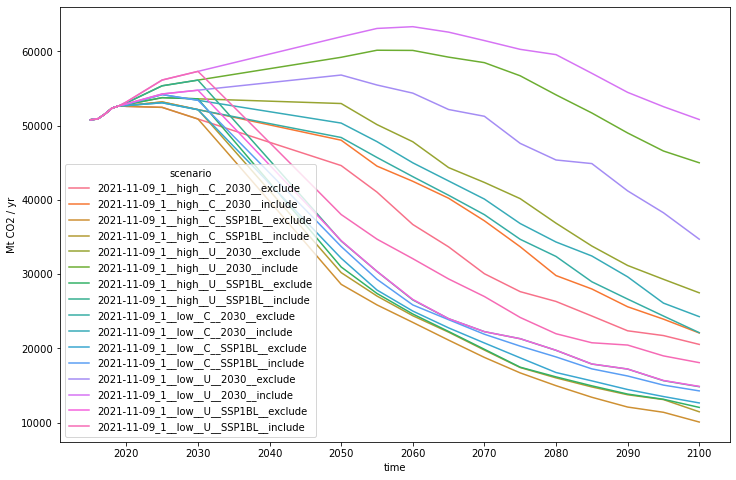

<IPython.core.display.Javascript object>

In [91]:
extended_emissions.filter(date="2021-11-09").lineplot()